# The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Brief information about the columns present in my dataset

- Gender : Gender refers to the biological sex of the individual
- age : Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.
- hypertension : Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. 
                 
- heart_disease : Heart disease is another medical condition that is associated with an increased risk of developing                          diabetes.
- smoking_history:Smoking history is also considered a risk factor for diabetes and can exacerbate the complications                          associated
- bmi : BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher         risk
- HbA1c_level : HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months.
- blood_glucose_level : Blood glucose level refers to the amount of glucose in the bloodstream at a given time.
                        High blood glucose levels are a key
- diabetes : Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 
              indicating there is no presence

# Checking Null Values

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

- There are no null values in the dataset

### Plotting the distribution of people who have diabetes and who don't have diabetes

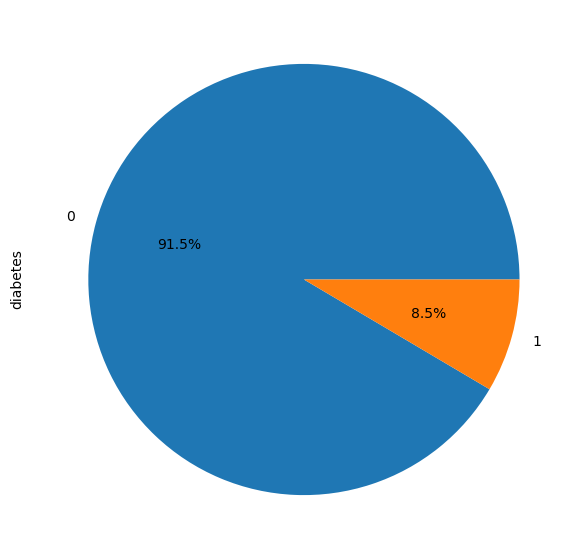

In [5]:
plt.figure(figsize=(7,7))
df['diabetes'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.show()

- From the pie chart we get to see that 91% people dont have diabetes and only 8.5% people have diabetes

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Now we will plot subplot

<AxesSubplot:xlabel='blood_glucose_level', ylabel='count'>

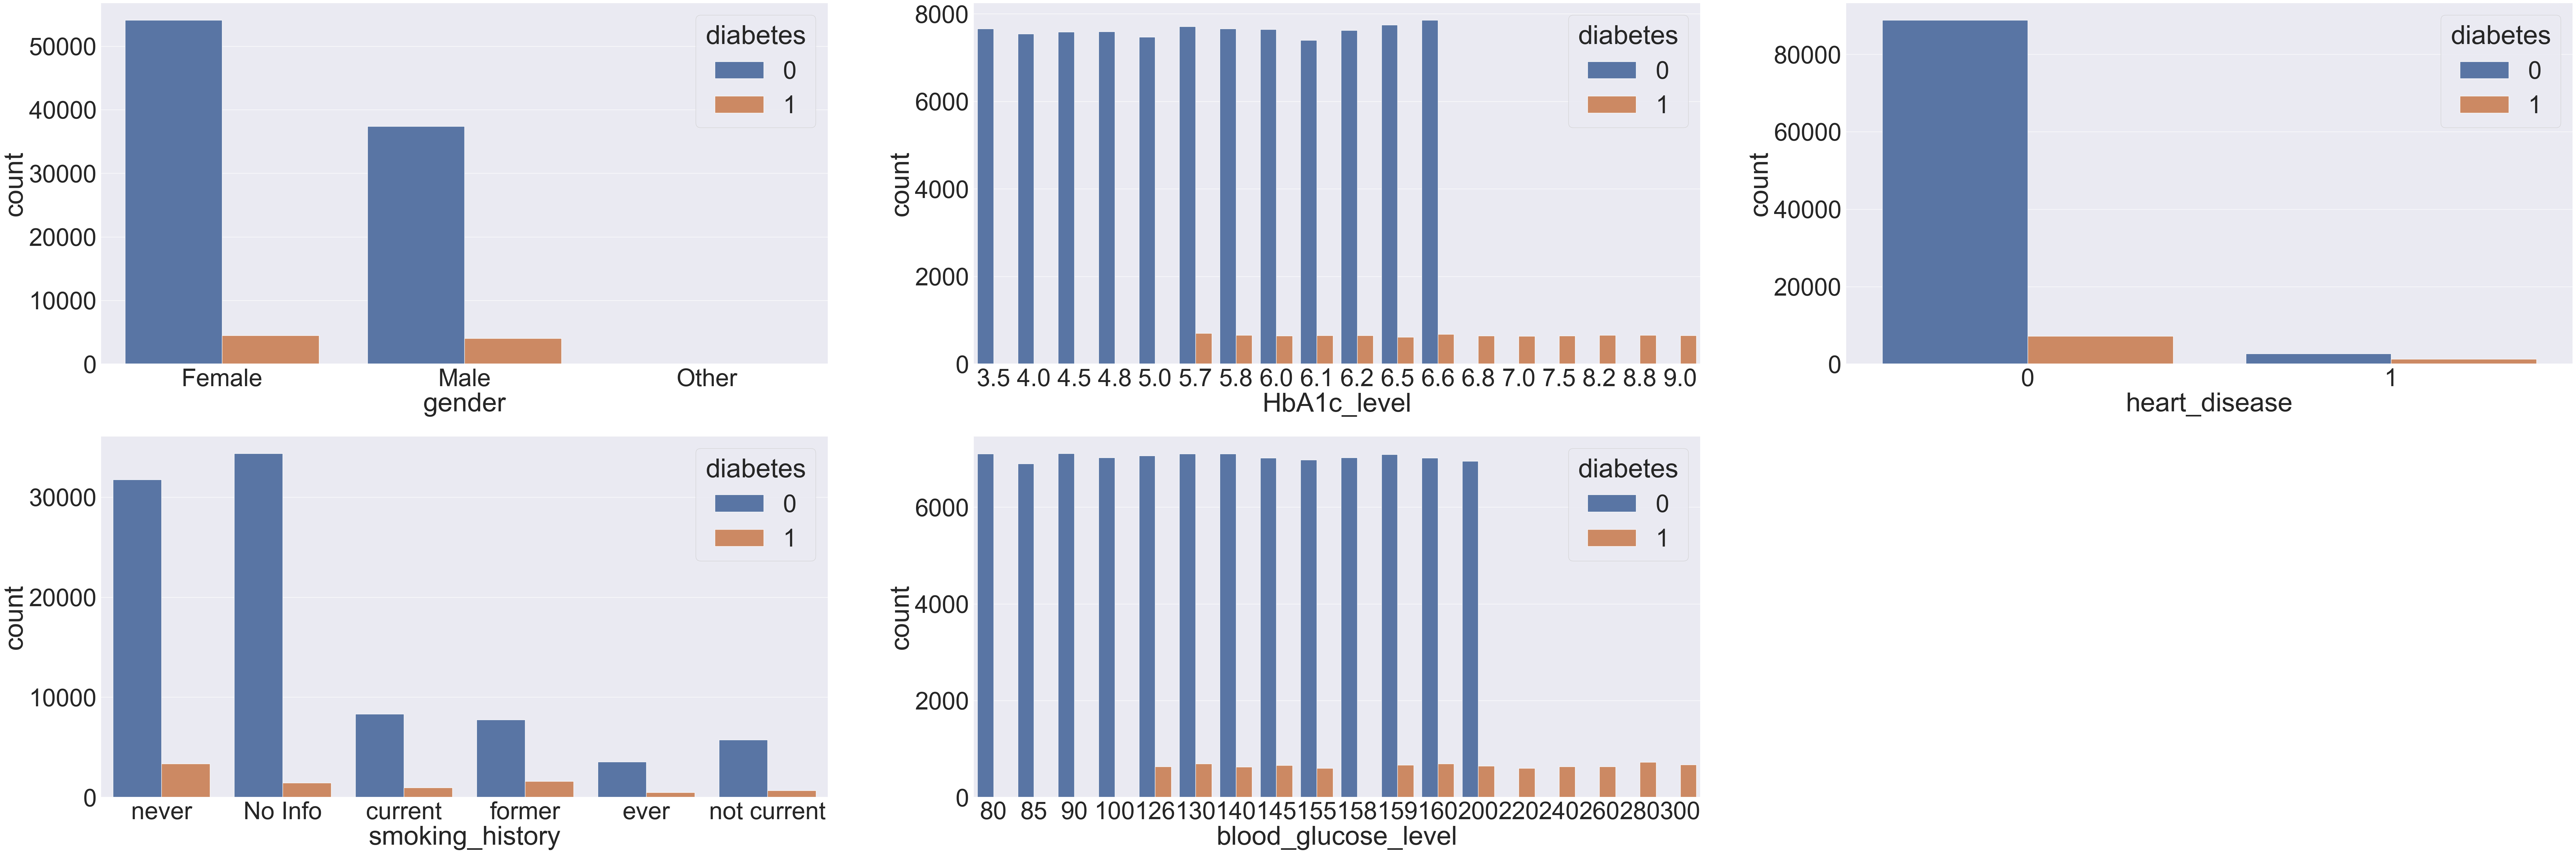

In [7]:
plt.figure(figsize = (100,50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['gender'],hue = df['diabetes'])

plt.subplot(332)
sns.countplot(df['HbA1c_level'],hue = df['diabetes'])

plt.subplot(333)
sns.countplot(df['heart_disease'],hue = df['diabetes'])

plt.subplot(334)
sns.countplot(df['smoking_history'],hue = df['diabetes'])

plt.subplot(335)
sns.countplot(df['blood_glucose_level'],hue = df['diabetes'])

- Almost 5000-7000 Male and Female have diabetes
- Also,blood glucose level>200  have diabetes
- HbA1c_level of >6.6 have diabetes
- nearly 90000 people are unaffected by diabetes

# Now we will see the correlation between our features and target column

In [8]:
df.corr().style.background_gradient(cmap='coolwarm')

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


# Importing Ordinal encoder as we have two categorical columns

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
oe = OrdinalEncoder()
oe.fit_transform(df[['gender','smoking_history']])

array([[0., 4.],
       [0., 0.],
       [1., 4.],
       ...,
       [1., 3.],
       [0., 4.],
       [0., 1.]])

In [11]:
cat_col = df.select_dtypes(object).columns

In [12]:
df[cat_col]

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current
...,...,...
99995,Female,No Info
99996,Female,No Info
99997,Male,former
99998,Female,never


In [13]:
df[cat_col] = oe.fit_transform(df[cat_col])

In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,4.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0


In [15]:
df.corr().style.background_gradient(cmap='coolwarm')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


# Splitting data into X and Y

In [16]:
x = df.iloc[:,0:-1]
y = df['diabetes']

In [17]:
x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.0,80.0,0,1,4.0,25.19,6.6,140
1,0.0,54.0,0,0,0.0,27.32,6.6,80
2,1.0,28.0,0,0,4.0,27.32,5.7,158
3,0.0,36.0,0,0,1.0,23.45,5.0,155
4,1.0,76.0,1,1,1.0,20.14,4.8,155


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

# Splitting data into training and testing

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=1)

## Trying different algorithms for best accuracy

# ----------------------------LOGISTIC REGRESSION-------------------------------------------

# Building Model

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

# Evaluating The Model

In [21]:
from sklearn.metrics import accuracy_score,classification_report
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print(ac)
print(cr)

0.9572
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27422
           1       0.89      0.57      0.70      2578

    accuracy                           0.96     30000
   macro avg       0.93      0.78      0.84     30000
weighted avg       0.96      0.96      0.95     30000



- We got accuracy of 96, which is great ! but lets try hypertunning and aim for the best accuracy

### Hypertunning

In [22]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [23]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print(ac)
print(cr)

0.9608666666666666
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27422
           1       0.89      0.62      0.73      2578

    accuracy                           0.96     30000
   macro avg       0.93      0.81      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [24]:
from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [25]:
logreg = LogisticRegression(solver = 'saga')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [26]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print(ac)
print(cr)

0.9613
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27422
           1       0.88      0.63      0.74      2578

    accuracy                           0.96     30000
   macro avg       0.92      0.81      0.86     30000
weighted avg       0.96      0.96      0.96     30000



In [27]:
logreg = LogisticRegression(solver = 'sag')
logreg.fit(xtrain,ytrain)
ypred = logreg.predict(xtest)

In [28]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print(ac)
print(cr)

0.9613
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27422
           1       0.88      0.63      0.74      2578

    accuracy                           0.96     30000
   macro avg       0.92      0.81      0.86     30000
weighted avg       0.96      0.96      0.96     30000



# --------------------------------------------KNN---------------------------------------------------------

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [30]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest,ypred)
print(ac)

0.9606


- Lets check if we can find the best value of K

In [31]:
ac_list = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    
    ac = accuracy_score(ytest,ypred)
    ac_list.append(ac)

In [32]:
ac_list

[0.9499,
 0.9621,
 0.9599666666666666,
 0.9617333333333333,
 0.9606,
 0.9619,
 0.9616666666666667,
 0.9619333333333333,
 0.9620666666666666,
 0.962,
 0.9623,
 0.9621333333333333,
 0.9619666666666666,
 0.9620666666666666,
 0.9625333333333334,
 0.9622,
 0.9627666666666667,
 0.9623666666666667,
 0.9624333333333334,
 0.9619666666666666,
 0.9624333333333334,
 0.9618666666666666,
 0.9620333333333333,
 0.9615333333333334,
 0.9618333333333333,
 0.9616,
 0.9619666666666666,
 0.9614333333333334,
 0.9616666666666667,
 0.9614333333333334]

# Plotting on Line Plot

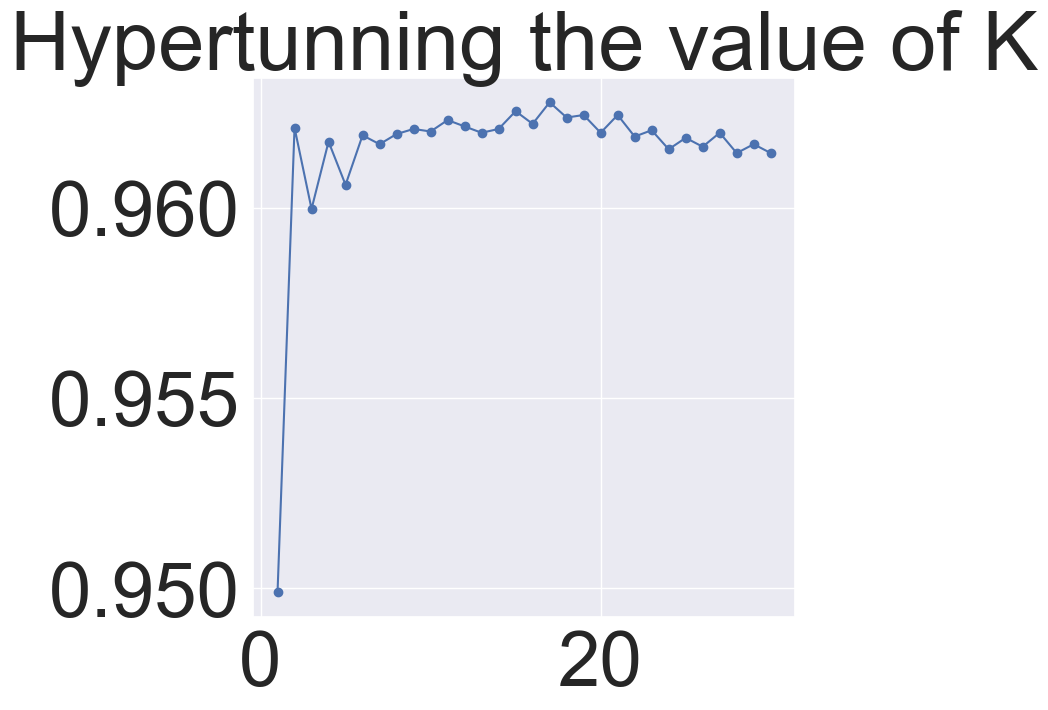

In [35]:
plt.figure(figsize = (7,7))
plt.title("Hypertunning the value of K")
plt.xlabel = ('value of k')
plt.ylabel = ('Accuracy')
plt.plot(range(1,31),ac_list,marker = 'o')
plt.show()

In [36]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [37]:
ac = accuracy_score(ytest,ypred)
print(ac)

0.9627666666666667


- When we keep n_neigbour as 17 we get the best accuracy

In [39]:
knn.score(xtrain, ytrain)

0.9642285714285714

In [42]:
knn.score(xtest, ytest)

0.9627666666666667

- As we can see there is no overfitting problem in the data set

# ----------------------------------------- SVM----------------------------------------------------------

In [43]:
from sklearn.svm import SVC

In [44]:
svm = SVC()

In [45]:
svm = KNeighborsClassifier(n_neighbors=17)
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [46]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print(ac)
print(cr)

0.9627666666666667
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27422
           1       0.97      0.59      0.73      2578

    accuracy                           0.96     30000
   macro avg       0.96      0.79      0.86     30000
weighted avg       0.96      0.96      0.96     30000



### Hypertunning`

In [47]:
svm = SVC(kernel = 'linear')
svm = KNeighborsClassifier(n_neighbors=17)
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [48]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print(ac)
print(cr)

0.9627666666666667
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27422
           1       0.97      0.59      0.73      2578

    accuracy                           0.96     30000
   macro avg       0.96      0.79      0.86     30000
weighted avg       0.96      0.96      0.96     30000



In [49]:
svm = SVC(kernel = 'poly')
svm = KNeighborsClassifier(n_neighbors=17)
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [50]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print(ac)
print(cr)

0.9627666666666667
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27422
           1       0.97      0.59      0.73      2578

    accuracy                           0.96     30000
   macro avg       0.96      0.79      0.86     30000
weighted avg       0.96      0.96      0.96     30000



#  -------------------------------- DECISION TREE ------------------------------------------------

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [62]:
dt =  DecisionTreeClassifier()
dt = LogisticRegression()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

In [63]:
ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
print(ac)
print(cr)

0.9613
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27422
           1       0.88      0.63      0.74      2578

    accuracy                           0.96     30000
   macro avg       0.92      0.81      0.86     30000
weighted avg       0.96      0.96      0.96     30000



# Checking if the model is overfit or not

In [69]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f'train score :{train} \n test score :{test}')

train score :0.9598142857142857 
 test score :0.9613


- here we can clearly see the model is not overfitted,its evenly balanced and is a good fit model

# ----------------------------------Conclusion-------------------------------------------------------

- Based on the above accuracy scores, we should go ahead with KNN model where we have hypertuned the n_neighbours as 17